In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [4]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")
matches.head() , deliveries.head()

(   id    Season       city        date                        team1  \
 0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
 1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
 2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
 3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
 4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   
 
                          team2                  toss_winner toss_decision  \
 0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
 1       Rising Pune Supergiant       Rising Pune Supergiant         field   
 2        Kolkata Knight Riders        Kolkata Knight Riders         field   
 3              Kings XI Punjab              Kings XI Punjab         field   
 4             Delhi Daredevils  Royal Challengers Bangalore           bat   
 
    result  dl_applied                       winner  win_by_runs  \
 0  normal           0      

In [6]:
total_score_df =deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9496\113141832.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df =deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [8]:
total_score_df[total_score_df['inning']==1]

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [10]:
match_df=matches.merge(total_score_df[['match_id', 'total_runs']], left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
2,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
4,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
1524,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155
1525,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162
1526,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,152


In [12]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [14]:
teams =[
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [16]:
match_df['team1']= match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']= match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']= match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')
match_df['team2']= match_df['team1'].str.replace('Deccan Charges','Sunrisers Hyderabad')

In [18]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df= match_df[match_df['team2'].isin(teams)]

In [20]:
match_df.shape

(1328, 20)

In [26]:

match_df= match_df[['match_id','city','winner','total_runs']]
delivery_df=match_df.merge(deliveries,on='match_id')
delivery_df=delivery_df[delivery_df['inning']==2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [29]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']
delivery_df['runs_left'] =delivery_df['total_runs_x']-delivery_df['current_score']
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])
delivery_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9496\2528283224.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308760,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,309,-152,4
308761,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,311,-154,3
308762,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,312,-155,2
308763,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,314,-157,1


In [33]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10  - wickets
delivery_df.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9496\4173134849.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


In [35]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


In [38]:
delivery_df['crr']= (delivery_df['current_score']*6)/ (120-delivery_df['balls_left'])
delivery_df['rrr']= (delivery_df['current_score']*6) /(delivery_df["balls_left"])


In [40]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0


In [42]:
delivery_df['result']= delivery_df.apply(result, axis=1)


In [46]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [49]:
final_df=final_df.sample(final_df.shape[0])

In [51]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
34684,Rajasthan Royals,Kings XI Punjab,Chandigarh,-48,75,-157,180,30.400000,18.240000,0
301681,Royal Challengers Bangalore,Delhi Capitals,Delhi,18,1,-110,193,8.823529,1050.000000,0
13602,Rising Pune Supergiant,Kolkata Knight Riders,Kolkata,-123,45,-185,158,22.480000,37.466667,1
28469,Rajasthan Royals,Chennai Super Kings,Jaipur,55,76,-34,109,7.363636,4.263158,1
299960,Kings XI Punjab,Royal Challengers Bangalore,Bengaluru,-138,37,-202,190,23.710843,53.189189,0


In [53]:
final_df.dropna(inplace=True)
final_df=final_df[final_df['balls_left']!=0]

In [84]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [85]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
282679,Sunrisers Hyderabad,Rajasthan Royals,Hyderabad,83,61,-51,203,12.203390,11.803279
162661,Sunrisers Hyderabad,Delhi Daredevils,Hyderabad,20,53,-58,80,5.373134,6.792453
75335,Chennai Super Kings,Rajasthan Royals,Ahmedabad,-156,6,-230,160,16.631579,316.000000
171174,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,117,94,-16,136,4.384615,1.212766
9174,Rising Pune Supergiant,Sunrisers Hyderabad,Pune,-164,6,-225,179,18.052632,343.000000
...,...,...,...,...,...,...,...,...,...
218871,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,-86,72,-103,115,25.125000,16.750000
52199,Royal Challengers Bangalore,Mumbai Indians,Johannesburg,69,54,-62,149,7.272727,8.888889
187199,Chennai Super Kings,Delhi Daredevils,Delhi,130,87,-23,178,8.727273,3.310345
57659,Deccan Chargers,Delhi Daredevils,Durban,-52,82,-154,161,33.631579,15.585366


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [88]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [89]:
pipe.fit(X_train, y_train)

C:\Users\Administrator\Desktop\sample_project_1\env\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [91]:
y_pred= pipe.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7458053121391209

In [95]:
pipe.predict_proba(X_test)[10]

array([0.26891323, 0.73108677])

In [97]:

def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [106]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [108]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
25016,1,4,6,63.6,36.4
25024,2,8,8,66.5,33.5
25030,3,1,6,73.6,26.4
25036,4,7,6,74.2,25.8
25042,5,12,6,69.8,30.2
25048,6,13,6,63.7,36.3
25054,7,9,6,62.1,37.9
25062,8,15,8,56.6,43.4
25068,9,7,6,57.4,42.6
25075,10,17,7,47.4,52.6


Text(0.5, 1.0, 'Target-178')

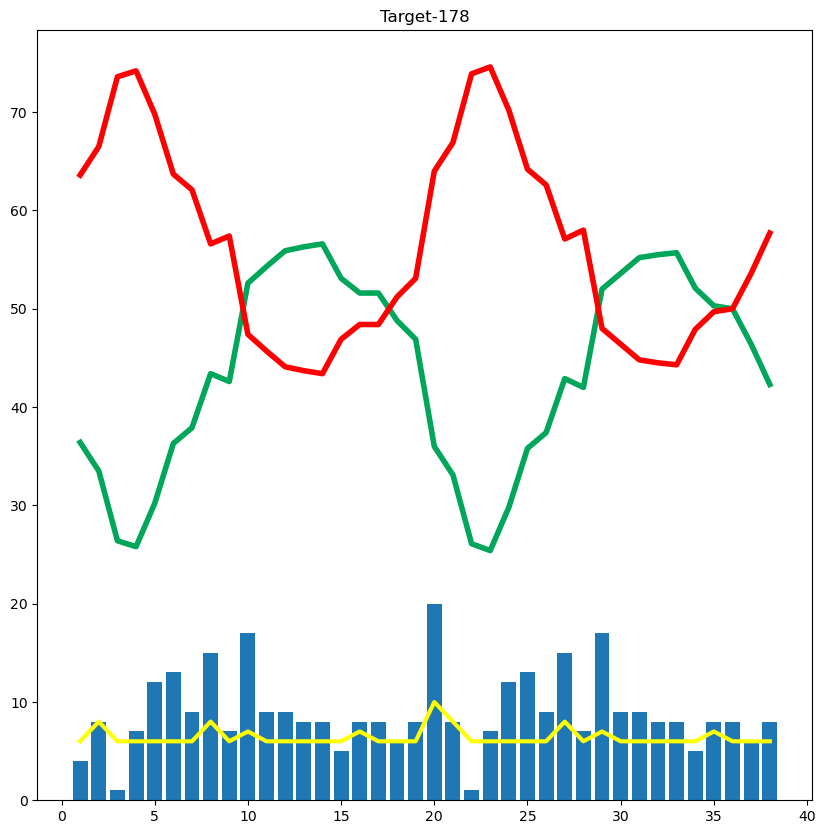

In [111]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [112]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))